In [1]:
%run 01_common_functions.ipynb

### Load and preprocess data

In [6]:
def get_rca_data():

    symptoms_data = pd.read_csv("root_cause_analysis.csv")

    label_encoder = preprocessing.LabelEncoder()
    symptoms_data['ROOT_CAUSE'] = label_encoder.fit_transform(symptoms_data['ROOT_CAUSE'])

    symptoms_np = symptoms_data.to_numpy().astype(float)

    X = symptoms_np[:, 1:8]
    y = symptoms_np[:, 8]
    y = tf.keras.utils.to_categorical(y, 3)

    return X, y

 

## Tuning the network

### Layers in the netowrk

In [7]:
accuracy_measures = {}
layer_list = []

for layer_count in range(1,6):
    layer_list.append(32)

    model_config = base_model_config()
    X, y = get_rca_data()

    model_config['HIDDEN_NODES'] = layer_list
    model_name = "Layers-" + str(layer_count)
    history = create_and_run_model(model_config, X, y, model_name)

    accuracy_measures[model_name] = history.history["accuracy"]

Model: "Layers-1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 32)                256       
                                                                 
 Output-Layer (Dense)        (None, 3)                 99        
                                                                 
Total params: 355
Trainable params: 355
Non-trainable params: 0
_________________________________________________________________
Model: "Layers-2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 32)                256       
                                                                 
 Dense-Layer-1 (Dense)       (None, 32)                1056      
                                                                 
 Output-Layer (Dense)        (None, 3)    

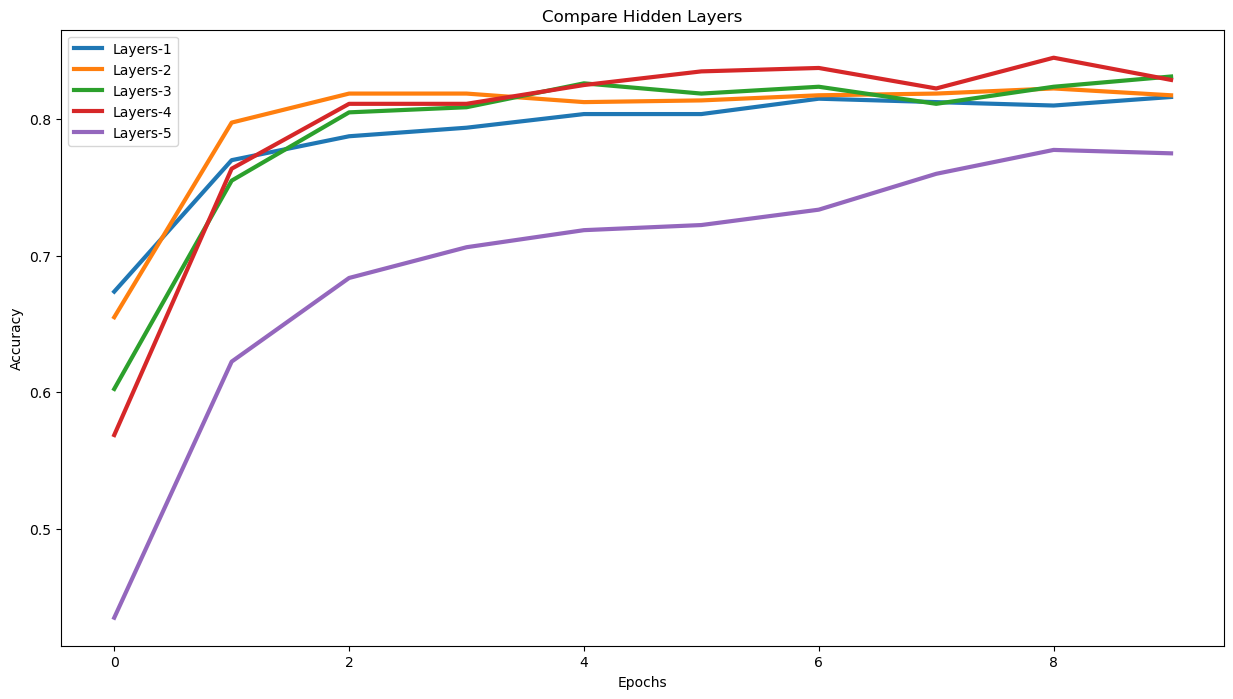

In [8]:
plot_graph(accuracy_measures, "Compare Hidden Layers")

### Nodes in a Layer

In [9]:
accuracy_measures = {}

node_increment = 8

for node_count in range(1,5):
    layer_list = []

    for layer_count in range(2):
        layer_list.append(node_count * node_increment)

    model_config = base_model_config()
    X, y = get_rca_data()

    model_config["HIDDEN_NODES"] = layer_list
    model_name = "Nodes-" + str(node_count * node_increment)
    history = create_and_run_model(model_config, X, y, model_name)

    accuracy_measures[model_name] = history.history["accuracy"]

Model: "Nodes-8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 8)                 64        
                                                                 
 Dense-Layer-1 (Dense)       (None, 8)                 72        
                                                                 
 Output-Layer (Dense)        (None, 3)                 27        
                                                                 
Total params: 163
Trainable params: 163
Non-trainable params: 0
_________________________________________________________________
Model: "Nodes-16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 16)                128       
                                                                 
 Dense-Layer-1 (Dense)       (None, 16)    

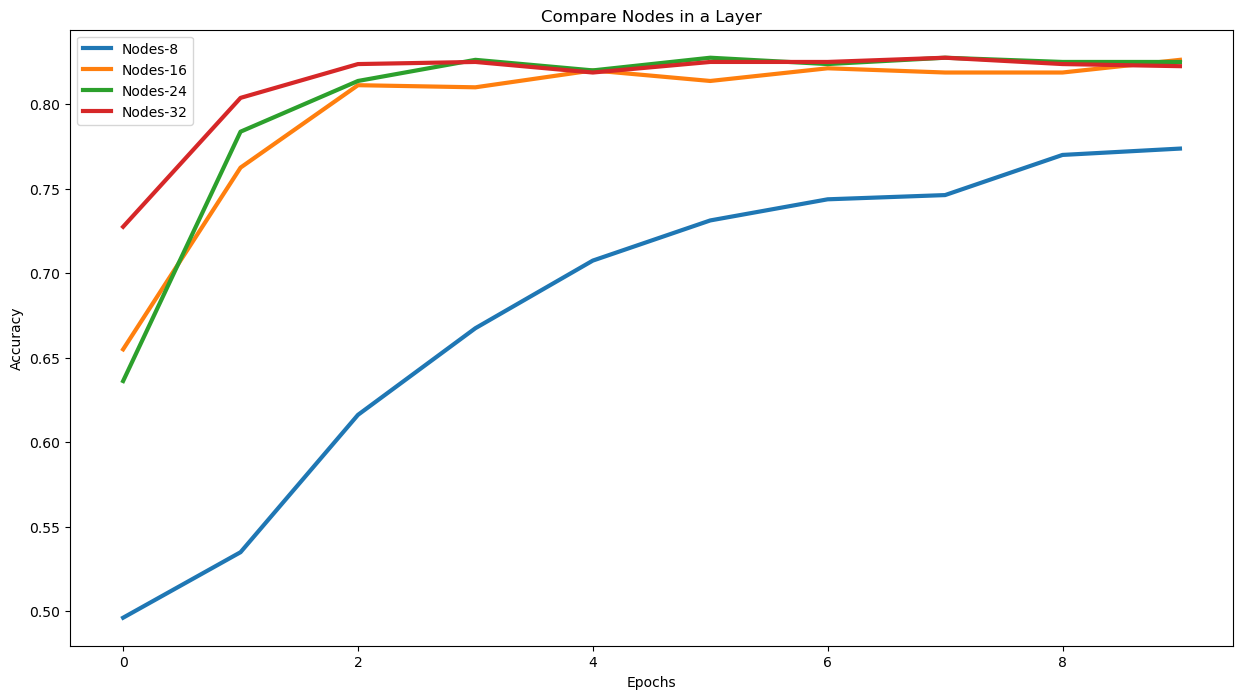

In [10]:
plot_graph(accuracy_measures, "Compare Nodes in a Layer")

## Tuning Back Propagation

### Optimizers

In [11]:
accuracy_measures = {}

optimizer_list = ['sgd', 'rmsprop', 'adam', 'adagrad']

for optimizer in optimizer_list:

    model_config = base_model_config()
    X, y = get_rca_data()

    model_config["OPTIMIZER"] = optimizer
    model_name = "Optimizer-" + optimizer
    history = create_and_run_model(model_config, X, y, model_name)

    accuracy_measures[model_name] = history.history["accuracy"]

Model: "Optimizer-sgd"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 32)                256       
                                                                 
 Dense-Layer-1 (Dense)       (None, 64)                2112      
                                                                 
 Output-Layer (Dense)        (None, 3)                 195       
                                                                 
Total params: 2,563
Trainable params: 2,563
Non-trainable params: 0
_________________________________________________________________
Model: "Optimizer-rmsprop"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 32)                256       
                                                                 
 Dense-Layer-1 (Dense)  

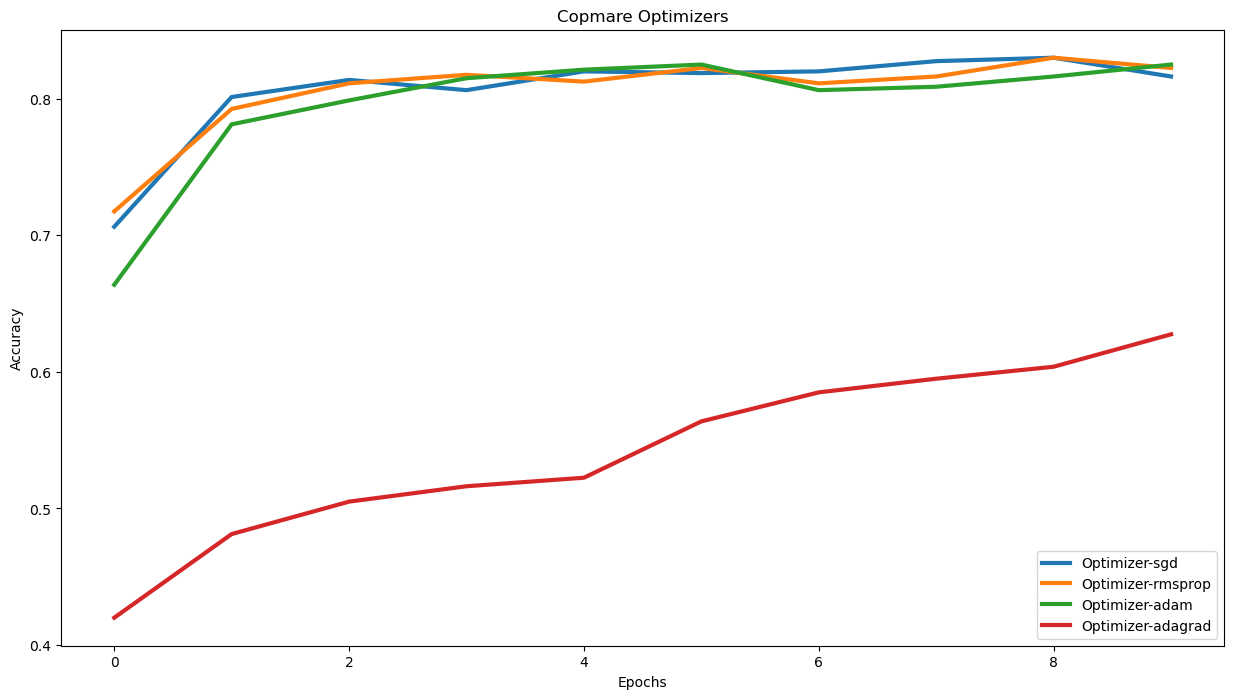

In [12]:
plot_graph(accuracy_measures, "Copmare Optimizers")

### Learning Rates

In [13]:
accuracy_measures = {}

learning_rate_list = [0.001, 0.005, 0.01, 0.1, 0.5]

for learning_rate in learning_rate_list:

    model_config = base_model_config()
    X, y = get_rca_data()

    model_config["OPTIMIZER"] = "rmsprop"
    model_config["LEARNING_RATE"] = learning_rate
    model_name = "Learning-Rate-" + str(learning_rate)
    history = create_and_run_model(model_config, X, y, model_name)

    accuracy_measures[model_name] = history.history["accuracy"]

Model: "Learning-Rate-0.001"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 32)                256       
                                                                 
 Dense-Layer-1 (Dense)       (None, 64)                2112      
                                                                 
 Output-Layer (Dense)        (None, 3)                 195       
                                                                 
Total params: 2,563
Trainable params: 2,563
Non-trainable params: 0
_________________________________________________________________
Model: "Learning-Rate-0.005"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 32)                256       
                                                                 
 Dense-Layer-1 (

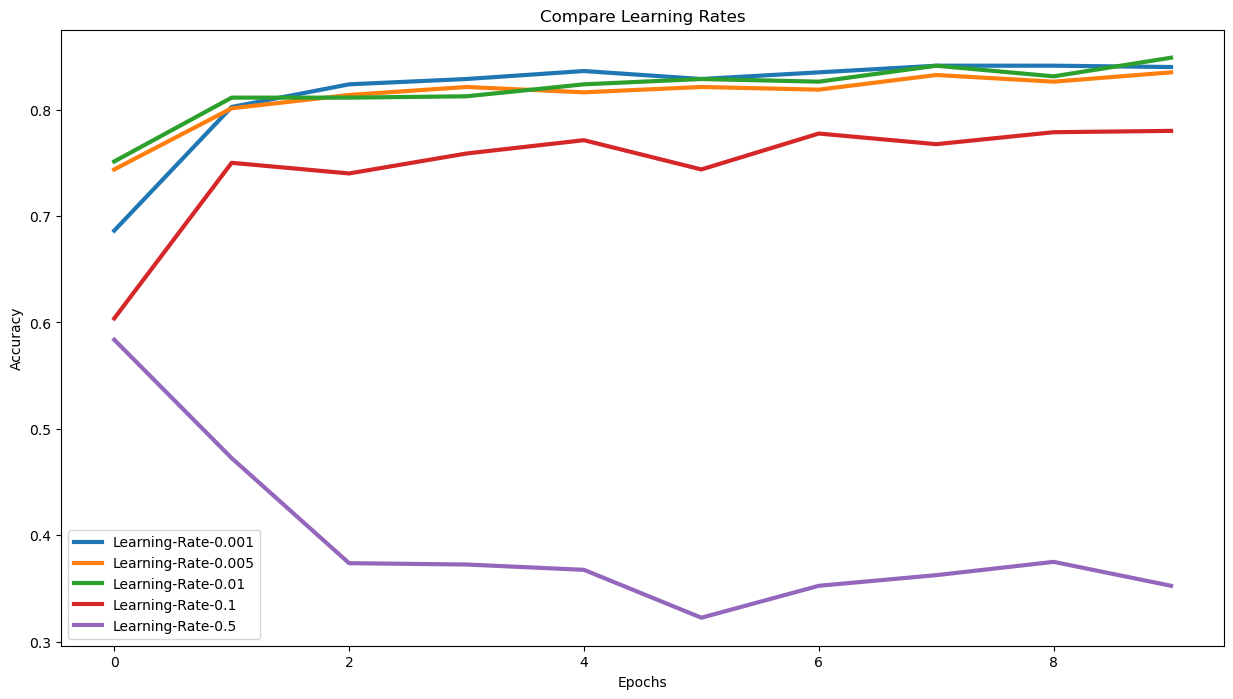

In [14]:
plot_graph(accuracy_measures, "Compare Learning Rates")

## Avoid Overfitting

### Regularizer

In [16]:
accuracy_measures = {}

regularizer_list = [None, 'l1', 'l2', 'l1_l2']

for regularizer in regularizer_list:

    model_config = base_model_config()
    X, y = get_rca_data()

    model_config["REGULARIZER"] = regularizer
    model_name = "Regularizer-" + str(regularizer)
    history = create_and_run_model(model_config, X, y, model_name)

    accuracy_measures[model_name] = history.history["val_accuracy"]

Model: "Regularizer-None"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 32)                256       
                                                                 
 Dense-Layer-1 (Dense)       (None, 64)                2112      
                                                                 
 Output-Layer (Dense)        (None, 3)                 195       
                                                                 
Total params: 2,563
Trainable params: 2,563
Non-trainable params: 0
_________________________________________________________________
Model: "Regularizer-l1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 32)                256       
                                                                 
 Dense-Layer-1 (Dense)  

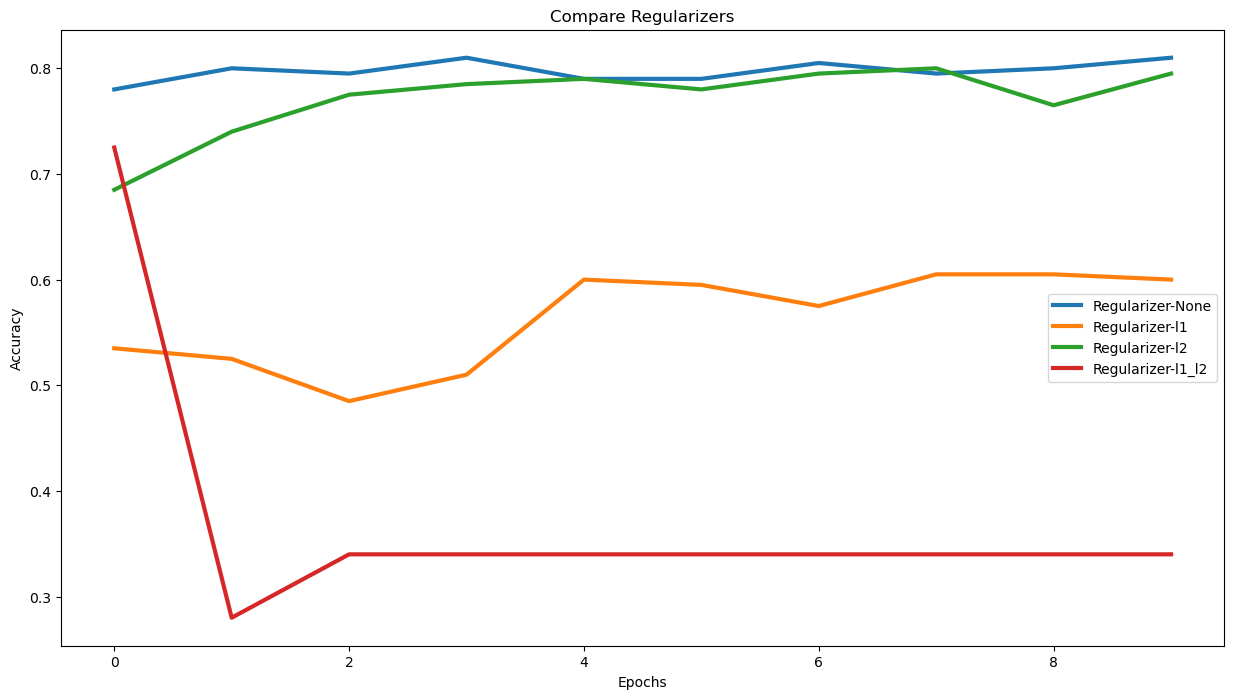

In [17]:
plot_graph(accuracy_measures, "Compare Regularizers")

### Dropout

In [18]:
accuracy_measures = {}

dropout_list = [0.0, 0.1, 0.2, 0.5]

for dropout in dropout_list:

    model_config = base_model_config()
    X, y = get_rca_data()

    model_config["REGULARIZER"] = "l2"
    model_config["DROPOUT_RATE"] = dropout
    model_name = "Dropout-" + str(dropout)
    history = create_and_run_model(model_config, X, y, model_name)

    accuracy_measures[model_name] = history.history["val_accuracy"]

Model: "Dropout-0.0"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 32)                256       
                                                                 
 Dense-Layer-1 (Dense)       (None, 64)                2112      
                                                                 
 Output-Layer (Dense)        (None, 3)                 195       
                                                                 
Total params: 2,563
Trainable params: 2,563
Non-trainable params: 0
_________________________________________________________________
Model: "Dropout-0.1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 32)                256       
                                                                 
 dropout (Dropout)           (No

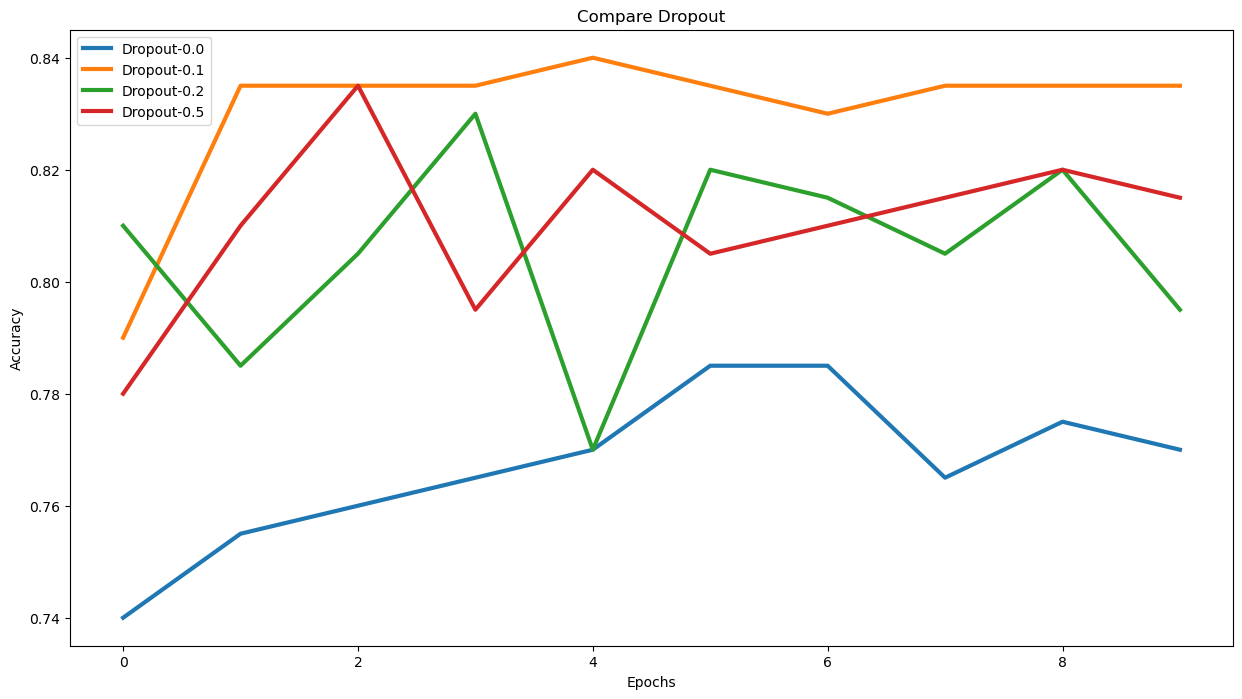

In [19]:
plot_graph(accuracy_measures, "Compare Dropout")

## Build final model

In [20]:
accuracy_measures = {}

# Base Minimal Model
model_config = base_model_config()
model_config["HIDDEN_NODES"] = [16]
model_config["NORMALIZATION"] = None
model_config["OPTIMIZER"] = "rmsprop"
model_config["LEARNING_RATE"] = 0.001
model_config["REGULARIZER"] = None
model_config["DROPOUT_RATE"] = 0.0

X, y = get_rca_data()

model_name = "Base-Model-" + str(layer_count)

history = create_and_run_model(model_config, X, y, model_name)

accuracy_measures[model_name] = history.history["accuracy"]

# Adding all optimzations
model_config = base_model_config()
model_config["HIDDEN_NODES"] = [32, 32]
model_config["NORMALIZATION"] = "batch"
model_config["OPTIMIZER"] = "rmsprop"
model_config["LEARNING_RATE"] = 0.001
model_config["REGULARIZER"] = "l2"
model_config["DROPOUT_RATE"] = 0.2

X, y = get_rca_data()

model_name = "Optimized-Model-" + str(layer_count)

history = create_and_run_model(model_config, X, y, model_name)

accuracy_measures[model_name] = history.history["accuracy"]




Model: "Base-Model-1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 16)                128       
                                                                 
 Output-Layer (Dense)        (None, 3)                 51        
                                                                 
Total params: 179
Trainable params: 179
Non-trainable params: 0
_________________________________________________________________
Model: "Optimized-Model-1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 32)                256       
                                                                 
 batch_normalization (BatchN  (None, 32)               128       
 ormalization)                                                   
                             

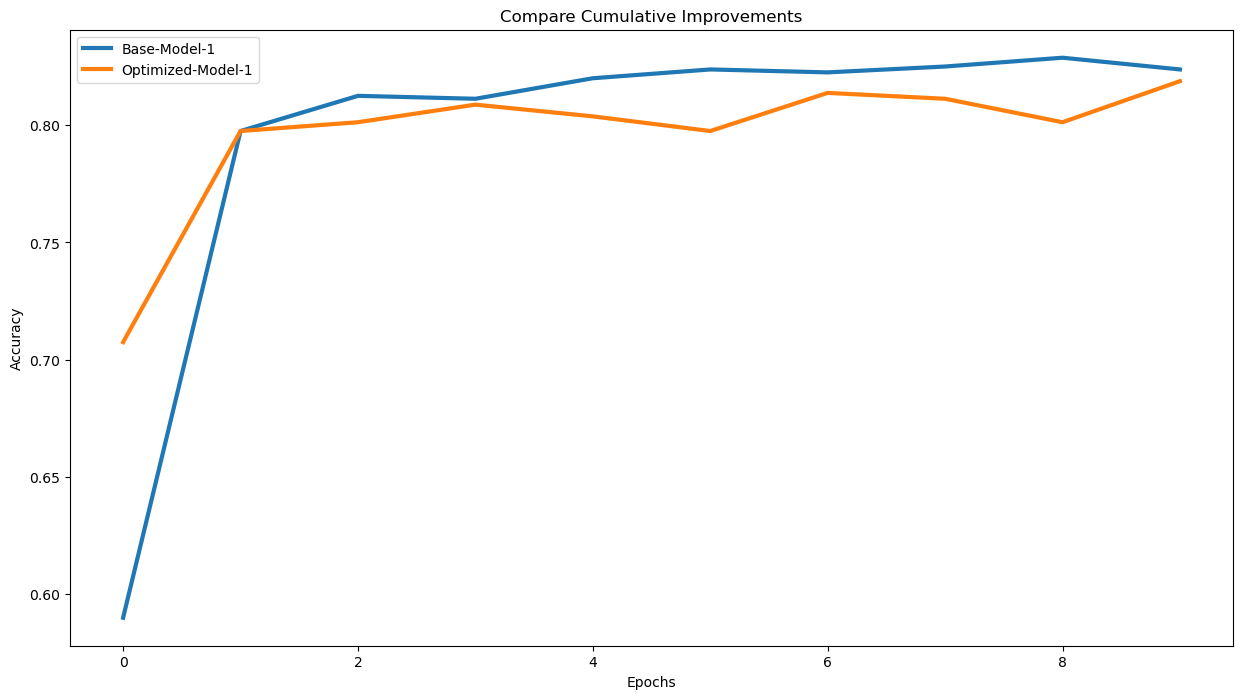

In [21]:
plot_graph(accuracy_measures, "Compare Cumulative Improvements")